In [42]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist # dataset
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [43]:
# we'll be using random later
# in order to get repeatable "random" data we seed it accordingly
np.random.seed(0)

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # turns the images into matrices

lets do some data exploration

In [45]:
print(len(X_train[0][0]))

28


In [46]:
print(len(X_train[0][1]))

28


In [47]:
# print(len(X_train))
# print(X_train)

In [48]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

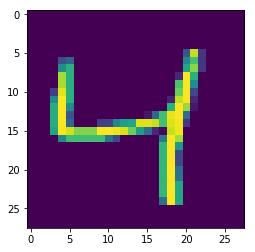

In [49]:
img = plt.imshow(X_train[2])

In [50]:
print(len(y_train))
print(y_train) # seems like y are the labels (the actual numbers)

60000
[5 0 4 ... 5 6 8]


In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [52]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "Not all images have the same size" # actually could also use a for loop but this shorthand is so much shorter
assert(X_test.shape[1:] == (28,28)), "Not all images have the same size"

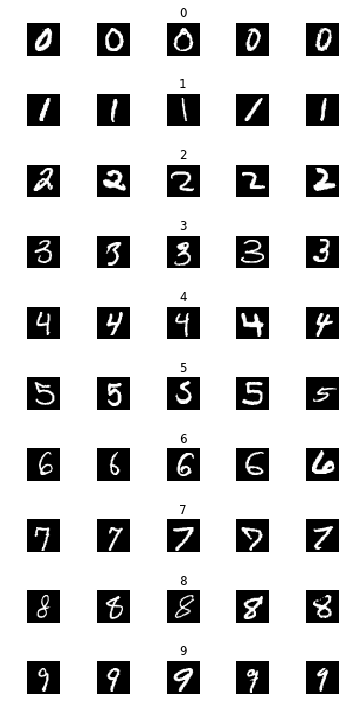

In [53]:
num_of_samples = []

cols = 5
num_classes = 10

# create some grids
# if you comment the code below this and run then you will see the empty grids that subpots created
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout() # positions and prevents overlap

# add the pics into the grids
for i in range(cols):
    for j in range(num_classes):
        # print(i, " i ", j, " j")
        
        # gets all the ones that is true aka the image with the number j
        x_selected = X_train[y_train == j]
        # print(y_train == j)
        
        # a bunch of images of the number j
        # for some reason plt.imshow only prints the last one (perhaps it changed from 1 - 9)
        # plt.imshow(x_selected[4])
                
        # plop it into the grid (subplot)
        # the random is just choosing a random from 0, 1, so on...
        # (2) is the color - we grayscale all the pics
        axs[j][i].imshow(
            x_selected[random.randint(0, len(x_selected - 1)), :, :],
            cmap=plt.get_cmap("gray")
        )
        
        # turn off the axis for each pic
        axs[j][i].axis("off")
        
        # add a title to the third item
        if i == 2:
            axs[j][i].set_title(str(j))
            
            # counts number of images per num (0, 1, 2) organized by index = num
            num_of_samples.append(len(x_selected))

In [54]:
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0.5, 1.0, 'distribution of the training dataset')

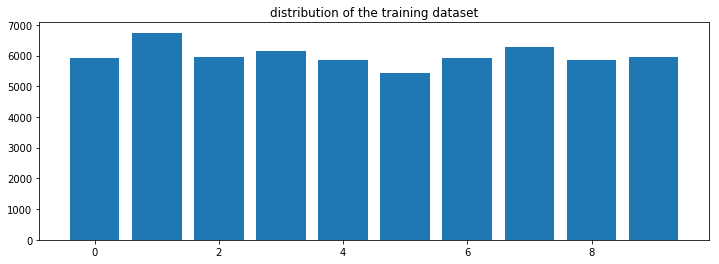

In [55]:
# plot the above in a bar graph

# sets the image size of the bar graph
plt.figure(figsize=(12,4))

# creating the bar graph
plt.bar(range(0, num_classes), num_of_samples)
plt.title("distribution of the training dataset")

In [56]:
# print(y_train)

In [57]:
# print(y_test)

In [58]:
# one hot encode
# turns categorical data (dog, cat) into numbers
# see: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
# (2) is just the number of categories (in this case there are 10 - 0 to 9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# not much happens to these two
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [59]:
# plus some normalization to between 0/1 or -1/1
X_train = X_train/255
X_test = X_test/255

# print(X_test[0])

In [60]:
# flatten each image instead of it being a matrix

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

# print(X_train[0])

In [62]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [63]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


- validation split is how much of the training set to move to validation on each epoch
- epoch is how many times to run it
- batch_size is how many images to use in each epoch
- verbose = 1 means true aka log everything
- shuffle = 1 means true aka shuffle on each

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.1, 
    epochs = 30, 
    batch_size = 200,
    verbose = 1,
    shuffle = 1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10


In [ ]:
# just showing the loss compared to the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

# as you can see the validation error (loss) increases as you have more epochs
# aka it is overfitting to the training so it performs badly on the validation